# Linear regression cheat sheet on house prices

<u>Quick reminder:</u> 

Objective of linear regression is to linearly approximate a target variabe Y 
(<b>sale price of a home</b>) using a set of p explanatory variables X1, X2, ..., Xp such as square meter, ....


In other words, we want to find coefficients \begin{equation} \beta_0, \beta_1, .. \beta_p \end{equation}

such as we could predict the price a home will be sold using some of its observed features as such: 

\begin{equation}
\hat{Y_i} = \beta_0 + \sum\limits_{j=1}^{p}\beta_j X_j
\end{equation}

<img src="https://www.toronto.ca/wp-content/uploads/2017/11/977d-BannerHouses-2-1024x338.jpg">

For the sake of simplicity, we will consider only one varibale $X_1$ to explain our price. 
We will find the best $(\hat{\beta_0}, \hat{\beta_1})$ that minimizes the loss on the training set and will further approximate the price of a test house i as such:

\begin{equation}
\hat{Y_i} = \beta_0 + \beta_1 X_i
\end{equation}

\begin{equation}
Y_i = \hat{Y_i} + \epsilon_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}

In [1]:
%matplotlib inline
from sklearn.datasets import make_regression, load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)
# http://courses.ischool.berkeley.edu/i247/f00/lectures/PostedResponses/Assignment4/heiser_wayne_assignment4.htm

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
import pandas
df_X = pandas.DataFrame(boston.get('data'), columns=boston.get('feature_names'))
Y = pandas.Series(boston.get('target'), name='Y')

To get a more comprehensive grasp of linear model, we will focus first on the simple varaible case where X is only 1 dimensional.
We will pick the feature that is the most correlated with our target variable Y. 

In [4]:
df = pandas.concat([df_X, Y], axis=1)

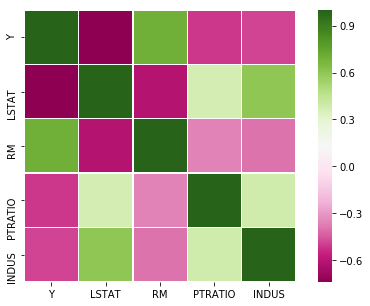

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
most_correlated_vars = corrmat.abs()['Y'].sort_values(ascending=False).head(5).index
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat.loc[most_correlated_vars, most_correlated_vars], cmap="PiYG", square=True, linewidths=.2)

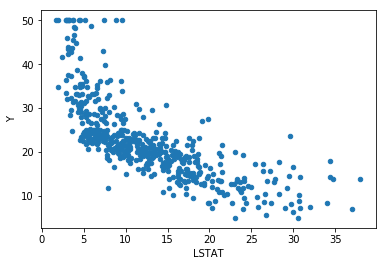

In [6]:
col = 'LSTAT'
df[[col,'Y']].plot(x=col, y='Y', kind='scatter')

For our study, we restrict the dataset on the center of the data cloud where the relations seems visually the most linear

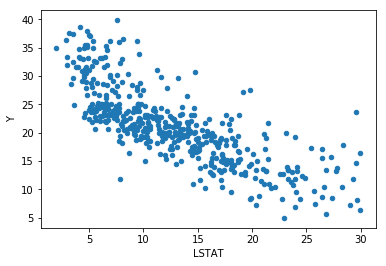

In [7]:
df = df.loc[(df.Y < 40)&(df.LSTAT < 30), ['LSTAT', 'Y']]
df[[col,'Y']].plot(x=col, y='Y', kind='scatter')

In [8]:
X = df[['LSTAT']].values
y = df.Y.values

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

We break our dataset into a train and a test set as usual.

In [10]:
shuffle_split = ShuffleSplit(n_splits=1, test_size=.25, random_state=11) 

In [11]:
train_index, test_index = next(shuffle_split.split(X))
df.loc[df.index[train_index], 'train_or_test'] = 'train'
df.loc[df.index[test_index], 'train_or_test'] = 'test'

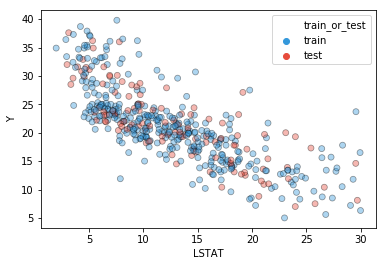

In [12]:
palette=dict(train="#3498db", test="#e74c3c")
# palette = 'Set1'
ax = sns.scatterplot(x=col, y="Y", hue="train_or_test", data=df, 
                     alpha=0.4, palette=palette, edgecolor='k')

In [13]:
X_train = df.loc[df.index[train_index], ['LSTAT']].values
y_train = df.loc[df.index[train_index], 'Y'].values
X_test = df.loc[df.index[test_index], ['LSTAT']].values
y_test = df.loc[df.index[test_index], 'Y'].values

<i>A more direct way to generate a training set and a test set would have been to use the turn key train_test_split function from sklearn.model_selection</i>

In [14]:
# from sklearn.model_selection train_test_split
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

Let's fit our linear model

In [15]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)

# Train the model using our hand built training set
lin_regr = regr.fit(X_train, y_train)

In [16]:
lin_regr.intercept_, lin_regr.coef_

(31.466034125568108, array([-0.81980938]))

In [17]:
y_hat_train  = lin_regr.predict(X_train)

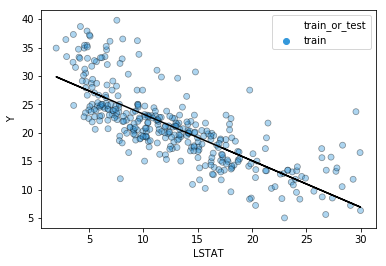

In [18]:
# palette=dict(train="#3498db", test="#e74c3c")
ax = sns.scatterplot(x=col, y="Y", hue="train_or_test", data=df.iloc[train_index,:], 
                     alpha=0.4, palette=palette, edgecolor='k')
plt.plot(X_train, y_hat_train, color='k')

We pick an example j (one random house) from our test set: 

In [19]:
a_house = df.iloc[test_index,:].sample(1)
j = a_house.index[0]

Our best guess for his price given our simple linear model would be: 

In [20]:
best_guess = lin_regr.intercept_ + lin_regr.coef_[0] * a_house.LSTAT.iat[0]
best_guess

25.842141748477559

Same as doing: 

In [21]:
lin_regr.predict(df.loc[[j], ['LSTAT']].values)

array([ 25.84214175])

Is that bad?

In [22]:
a_house.Y.iat[0], best_guess

(23.300000000000001, 25.842141748477559)

Now we compute the prediction on all test houses: 

In [23]:
y_hat_test = lin_regr.predict(X_test)

Plot of test set with prediction for all test data. 

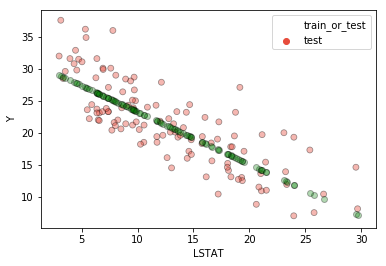

In [24]:
ax = sns.scatterplot(x=col, y="Y", hue="train_or_test", data=df.iloc[test_index,:], 
                     alpha=0.4, palette=palette, edgecolor='k')
plt.scatter(X_test, y_hat_test, color='g', alpha=0.3, edgecolors='k')

The green points are our linear price estimates for all red test house data. 

## Residuals analysis

In [25]:
df_errors = pandas.DataFrame({'Y': y_test, 'Y_hat': y_hat_test})

In [26]:
df_errors['error'] = df_errors['Y'] - df_errors['Y_hat']

Residual (errors) should be gaussian / test. 

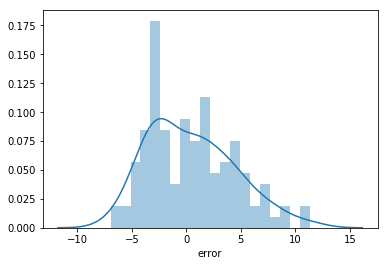

In [27]:
sns.distplot(df_errors['error'], bins=20)

### Interesting checks

As $\epsilon$ is orthogonal to $ F = Vect(1, X_1,.., X_p)$, $\epsilon$ is orthogonal to $1 \in F$ : 

<img src="./img/projv2.jpg" height="150" width="350">

\begin{equation}
\langle\epsilon, \overrightarrow{1}\rangle = \epsilon.\overrightarrow{1} = \sum\limits_{i=1}^{n}{\epsilon_i} = 0 
\end{equation}

In [28]:
import numpy
numpy.sum(y_train - y_hat_train) < 10e-6

True

<i> y_train has been computed using the $\beta$ which is a computed value and thus differ very slightly from theorical one ==> We don't have pure 0 for our checks.</i>

\begin{equation}
\langle \epsilon, \hat{Y}\rangle = 0 
\end{equation}

In [29]:
numpy.dot(y_hat_train, y_train - y_hat_train) < 10e-6

True

Also, always as $\epsilon$ is orthogonal to $ F = Vect(1, X_1,.., X_p)$, $Y = \hat{Y} + \epsilon = X.\hat{\beta} + \epsilon$ and $ X.\hat{\beta} \in F$ , we should have:

$${\lVert Y\rVert}^2 = {\lVert \hat{Y}\rVert}^2 + {\lVert \epsilon\rVert}^2 $$

In [30]:
(y_train ** 2).sum() - ((y_hat_train ** 2).sum() + ((y_train - y_hat_train) ** 2).sum()) < 10e-6

True

\begin{equation}
{\lVert \hat{Y}\rVert}^2 = \langle \hat{Y}, \hat{Y}\rangle = \langle Y, \hat{Y}\rangle
\end{equation}

In [31]:
(y_hat_train ** 2).sum() - numpy.dot(y_train, y_hat_train) < 10e-6 

True

$$\bar{Y} = \frac{1}{n} Y.\overrightarrow{1} = \frac{1}{n}(\hat{Y} + \epsilon).\overrightarrow{1} = \frac{1}{n}\hat{Y}.\overrightarrow{1} = \bar{\hat{Y}}$$  

In [32]:
y_train.mean() - y_hat_train.mean() < 10e-6

True

## Mean Square Error (MSE)

In [33]:
mean_square_error = (df_errors['error'] ** 2).sum() / len(df_errors)

In [34]:
mean_square_error

15.475373650855369

Same as:

In [35]:
from sklearn.metrics import mean_squared_error
mean_square_error2 = mean_squared_error(y_test, y_hat_test)
mean_square_error2

15.475373650855371

In [36]:
mean_square_error - mean_square_error2 < 10e-6

True

## The loss minimisation view

## R Square

The <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">coefficient of determination</a> $R^2$ of the prediction is defined by: $$ R^2 = 1 -
\frac{{\lVert Y-\hat{Y}\rVert}^2}{{\lVert Y-\bar{Y}\rVert}^2}$$

In [51]:
def square_norm(x):
    return (x * x).sum()

R2_test = 1 - square_norm(y_test - y_hat_test) / square_norm(y_test - y_test.mean())

In [52]:
R2_test

0.64042499427637267

slearn makes it straightforward to compute $R^2$

In [53]:
lin_regr.score(X_test, y_test)

0.64042499427637267

In [54]:
assert(R2_test - lin_regr.score(X_test, y_test) < 10e-6)

<img src="./img/projv2.jpg" height="150" width="350">

##### $R^2$ is equal to the square correlation between $Y$ and $\hat{Y}$ (training set)

In [47]:
R2_train = lin_regr.score(X_train, y_train)

In [55]:
r_pearson_square_train = numpy.corrcoef(y_train, y_hat_train)[0,1] ** 2

<li>https://economictheoryblog.com/2014/11/05/proof/</li>
<li>http://monde.cirano.qc.ca/~dufourj/Web_Site/ResE/Dufour_1983_R2_W.pdf</li>

We define the sample coefficient of correlation $\rho$ between Y and $\hat{Y}$ as follow:

$$\rho(Y, \hat{Y}) = \frac{C(Y,\hat{Y})}{\sqrt{V(Y)}\sqrt{V(\hat{Y})}} =\frac{\langle Y - \bar{Y}, \hat{Y} - \bar{\hat{Y}}\rangle}{{\lVert Y-\bar{Y}\rVert}{\lVert \hat{Y}-\bar{\hat{Y}}\rVert}}$$

We have: $\bar{Y} = \bar{\hat{Y}}$

$$\rho(Y, \hat{Y}) = \frac{\langle \hat{Y} + \epsilon - \bar{Y}, \hat{Y} - \bar{Y}\rangle}{{\lVert Y-\bar{Y}\rVert}{\lVert \hat{Y}-\bar{Y}\rVert}}$$

$\hat{Y}$ and $\bar{Y}$ belong to F, and $\epsilon$ is othogonal to F by construction, so 
$\langle \epsilon, \hat{Y} - \bar{Y}\rangle = 0$ and thus:

$$\rho(Y, \hat{Y}) = \frac{\langle \hat{Y} - \bar{Y}, \hat{Y} - \bar{Y}\rangle}{{\lVert Y-\bar{Y}\rVert}{\lVert \hat{Y}-\bar{Y}\rVert}} = \frac{{\lVert \hat{Y}-\bar{Y}\rVert}^2}{{\lVert Y-\bar{Y}\rVert}{\lVert \hat{Y}-\bar{Y}\rVert}} = \frac{{\lVert \hat{Y}-\bar{Y}\rVert}}{{\lVert Y-\bar{Y}\rVert}} $$

So,  

$$\rho(Y, \hat{Y})^2 = \frac{{\lVert \hat{Y}-\bar{Y}\rVert}^2}{{\lVert Y-\bar{Y}\rVert}^2}$$

The last step is to notice that, given the fact that $\epsilon$ is othogonal to $\hat{Y}$ and $\bar{Y}$ (=> $\epsilon$ othogonal to $\hat{Y} -\bar{Y}$), by <a href="http://www.math.harvard.edu/~knill/teaching/summer2011/handouts/12-dotproduct.pdf">Pythagore theorem</a>:

$$ {\lVert Y-\bar{Y}\rVert}^2 = {\lVert Y-\hat{Y}+ \hat{Y} -\bar{Y}\rVert}^2 = {\lVert \epsilon + \hat{Y} -\bar{Y}\rVert}^2 = {\lVert \epsilon \rVert}^2 + {\lVert \hat{Y} -\bar{Y}\rVert}^2$$

$$ R^2 = 1 - \frac{{\lVert Y-\hat{Y}\rVert}^2}{{\lVert Y-\bar{Y}\rVert}^2} = \frac{{\lVert Y-\bar{Y}\rVert}^2 - {\lVert Y-\hat{Y}\rVert}^2}{{\lVert Y-\bar{Y}\rVert}^2} = \frac{{\lVert Y-\bar{Y}\rVert}^2 - {\lVert \epsilon \rVert}^2}{{\lVert Y-\bar{Y}\rVert}^2} = \frac{{\lVert \hat{Y}-\bar{Y}\rVert}^2}{{\lVert Y-\bar{Y}\rVert}^2}$$


$$R^2 = \rho(Y, \hat{Y})^2$$

#### Interpretation and limitations of R2

<li>http://statisticsbyjim.com/regression/interpret-r-squared-regression/</li>
<li>http://danshiebler.com/2017-06-25-metrics/</li>

## Tests

## Spearman correlation coefficient

# Linear Regression using Tensorflow

### Latex 

https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

$e^{i\pi} + 1 = 0$

https://linareskevin.wordpress.com/2015/09/17/linear-regression-equation-in-latex-using-texmaths-under-libreoffice/

\begin{equation}
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
\end{equation}

\begin{equation}
\sigma^2 = \frac{\sum\limits_{i=1}^{n}(y_i – \bar{y})^2} {n – 1}
\end{equation}

\begin{equation}
\sigma = \sqrt\frac{\sum\limits_{i=1}^{n}(y_i – \bar{y})^2} {n – 1}
\end{equation}

\begin{equation}
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}

\begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation}

\begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation}

\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i
\end{equation}

\begin{equation}
\hat{\sigma}^2 = \frac{\sum{\hat{\epsilon}}^2_i} {n – 2} = \frac{\sum(Y_i – \hat{Y}_i)^2} {n – 2}
\end{equation}

\begin{equation}
\hat{\sigma} = \sqrt\frac{\sum(Y_i – \hat{Y}_i)^2} {n – 2}
\end{equation}

\begin{equation}
\hat{\sigma}{_\hat{\beta}{_1}} = \frac{\hat{\sigma}} {\sqrt{\sum(X_i – \bar{X})^2}}
\end{equation}

\begin{equation}
\hat{\sigma}{_\hat{\beta}}{_0} = \hat{\sigma} \sqrt\frac{\sum(X_i)^2} {n\sum(X_i – \bar{X})^2}
\end{equation}

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

$$\lVert{ \biggl(\sum_{n=1}^N \mathbf{P}_{n}\biggr) }^2\rVert$$

In [1]:
%%latex
\begin{align}
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

$$
Var[X] = E[(X - E[X])'(X - E[X])] = E[X'X - X'E[X] - E[X]'X + E[X]'E[X]]
$$
$$
= E[X'X] - E[X]'E[X] = 
E\left[
\begin{pmatrix}
X_1 & X_2
\end{pmatrix}
\begin{pmatrix}
X_1 \\ X_2
\end{pmatrix} -
\begin{pmatrix}
E[X_1] & E[X_2]
\end{pmatrix}
\begin{pmatrix}
E[X_1] \\ E[X_2]
\end{pmatrix}
\right]
$$
$$
= \begin{pmatrix}
E[X_1^2] - E[X_1]^2 & E[X_1X_2] - E[X_1]E[X_2] \\
E[X_2X_1] - E[X_2]E[X_1] & E[X_2^2] - E[X_2]^2
\end{pmatrix}
= \begin{pmatrix}
Var[X_1] & Cov[X_1,X_2] \\
Cov[X_1,X_2] & Var[X_2].
\end{pmatrix}
$$

https://ieaghg.org/docs/General_Docs/3rd_SRN/Kenshi_Itaoka_RegressionInterpretationSECURED.pdf

Test

https://people.eecs.ku.edu/~jhuan/EECS940_S12/slides/linearRegression.pdf

https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

http://www.lmd.polytechnique.fr/~sturquet/teaching_data/mu001/chap8.pdf